In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
cc = pd.read_csv('Churn_Modelling.csv')
cc.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
l=len(cc[cc.Exited==1])
nl=len(cc[cc.Exited==0])
print("Total Customers",l+nl)
print("Number of Customers won't leave the bank",nl)
print("Number of Customers will leave the bank",l)

Total Customers 10000
Number of Customers won't leave the bank 7963
Number of Customers will leave the bank 2037


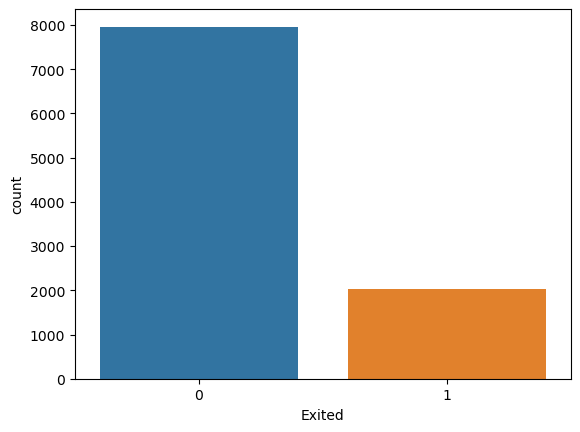

In [11]:
sns.countplot(x=cc['Exited'])
plt.show()


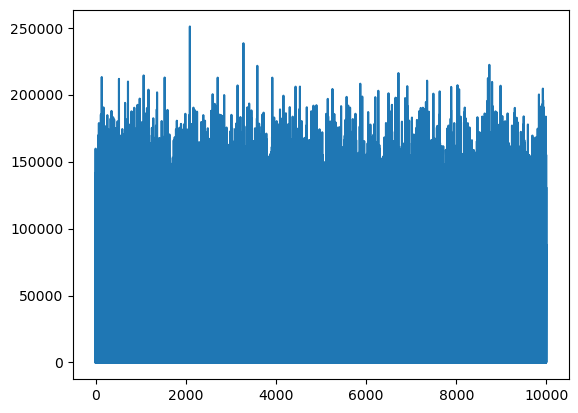

In [15]:
Balance = cc['Balance'].values
plt.plot(Balance)
plt.show()

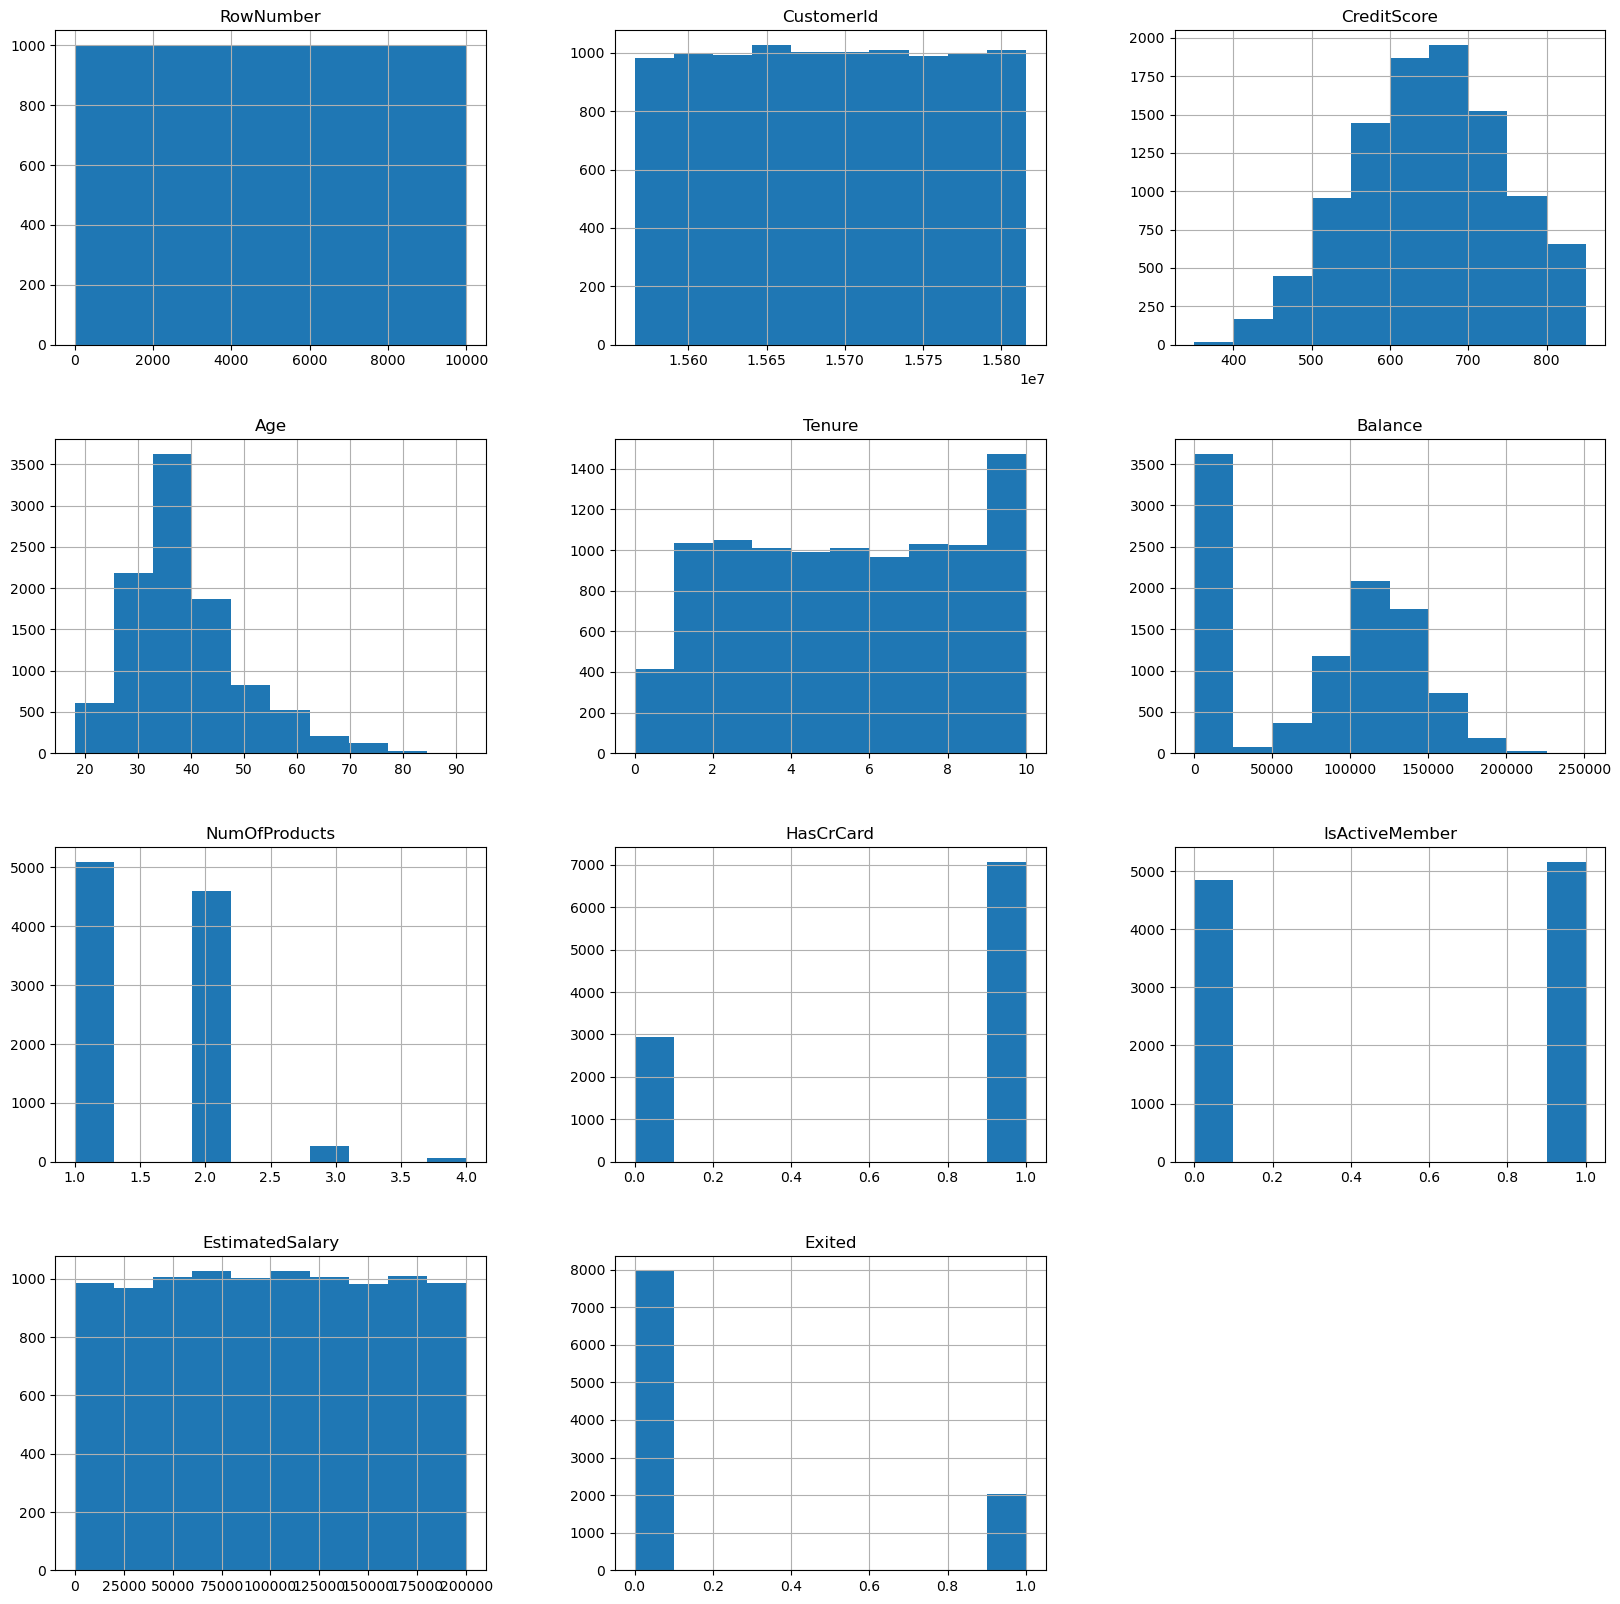

In [17]:
cc.hist(figsize = (20, 20))
plt.show()

In [3]:
print("Current columns:", cc.columns)
print(cc.shape);
cc.isnull().values.any()

Current columns: Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
(10000, 14)


False

In [4]:
columns_to_drop = ['Geography', 'Gender', 'Age', 'Tenure', 'EstimatedSalary','CreditScore','HasCrCard','Surname']
cc = cc.drop(columns=columns_to_drop)
cc.columns


Index(['RowNumber', 'CustomerId', 'Balance', 'NumOfProducts', 'IsActiveMember',
       'Exited'],
      dtype='object')

In [5]:
x=cc.drop('Exited',axis=1)
y=cc['Exited']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("shape of x_train:",x_train.shape)
print("shape of y_test_x:",x_test.shape)

shape of x_train: (8000, 5)
shape of y_test_x: (2000, 5)


In [6]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(x_train, y_train)

predictions_rf = random_forest.predict(x_test)
random_forest_score = random_forest.score(x_test, y_test) * 100
print("Random Forest Score: ", random_forest_score)

Random Forest Score:  80.65


In [7]:
confusion_matrix_rf = confusion_matrix(y_test, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[1508   99]
 [ 288  105]]


In [8]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))
print("Evaluation of Random Forest Model")
print()
metrics(y_test, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.80650
Precision: 0.51471
Recall: 0.26718
F1-score: 0.35176
